# Langkah 1

In [ ]:
from google.colab import files
uploaded = files.upload()   # Akan muncul tombol "Choose File"


Saving MobilePhonesData_Cleaned.csv to MobilePhonesData_Cleaned (1).csv


# Langkah 2

In [ ]:
import os
print(os.listdir())


['.config', 'MobilePhonesData_Cleaned.csv', 'figures', 'MobilePhonesData_Cleaned (1).csv', 'sample_data']


# Langkah 3

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

os.makedirs("figures", exist_ok=True)
sns.set(style="whitegrid")


# Gambar 1

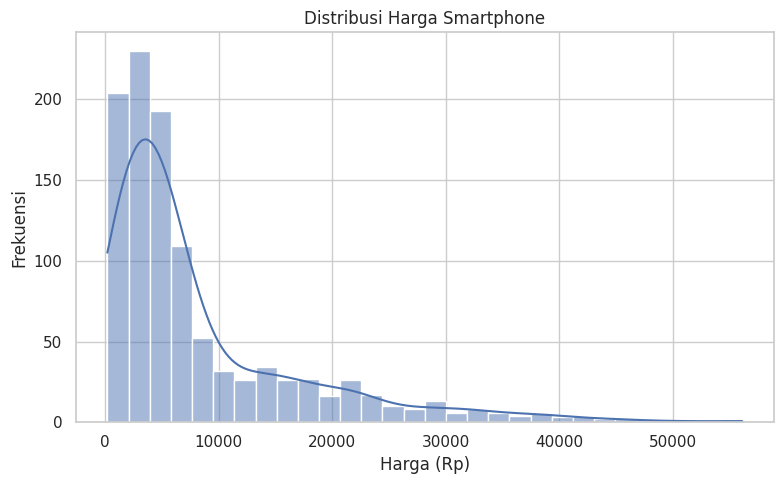

In [ ]:
# Distribusi Harga Smartphone (Price Distribution)
plt.figure(figsize=(8,5))
sns.histplot(df['best_price'], kde=True, bins=30)
plt.title('Distribusi Harga Smartphone')
plt.xlabel('Harga (Rp)')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

# Gambar 2

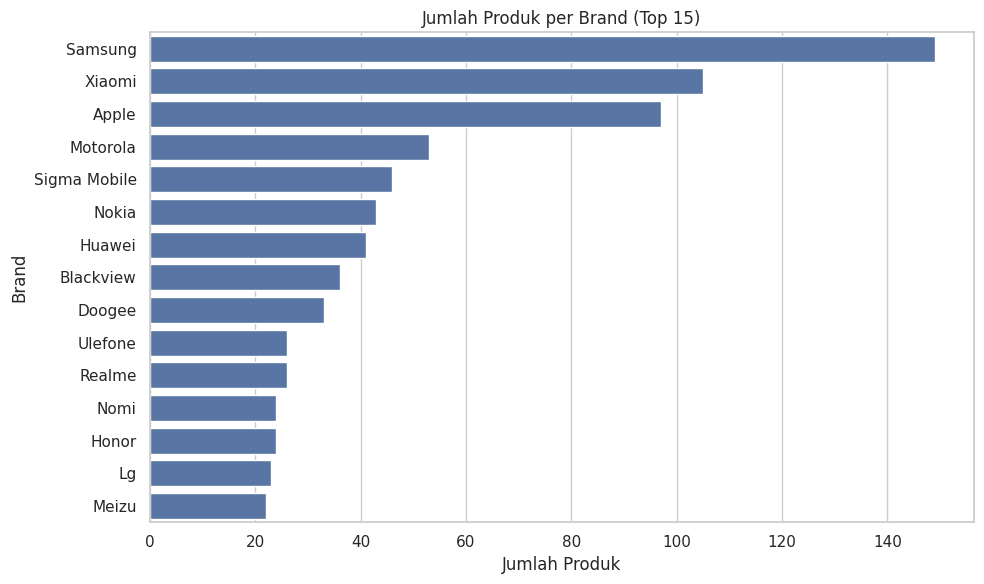

In [ ]:
# Jumlah produk per merek (Brand Counts)
plt.figure(figsize=(10,6))
order = df['brand_name'].value_counts().index[:15]  # ambil 15 brand teratas
sns.countplot(data=df, y='brand_name', order=order)
plt.title('Jumlah Produk per Brand (Top 15)')
plt.xlabel('Jumlah Produk')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

# Langkah 4

In [ ]:
df.columns


Index(['brand_name', 'model_name', 'os', 'popularity', 'best_price',
       'lowest_price', 'highest_price', 'sellers_amount', 'screen_size',
       'memory_size', 'battery_size', 'release_date', 'age_years',
       'release_year'],
      dtype='object')

# Gambar 3

/tmp/ipython-input-272228269.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


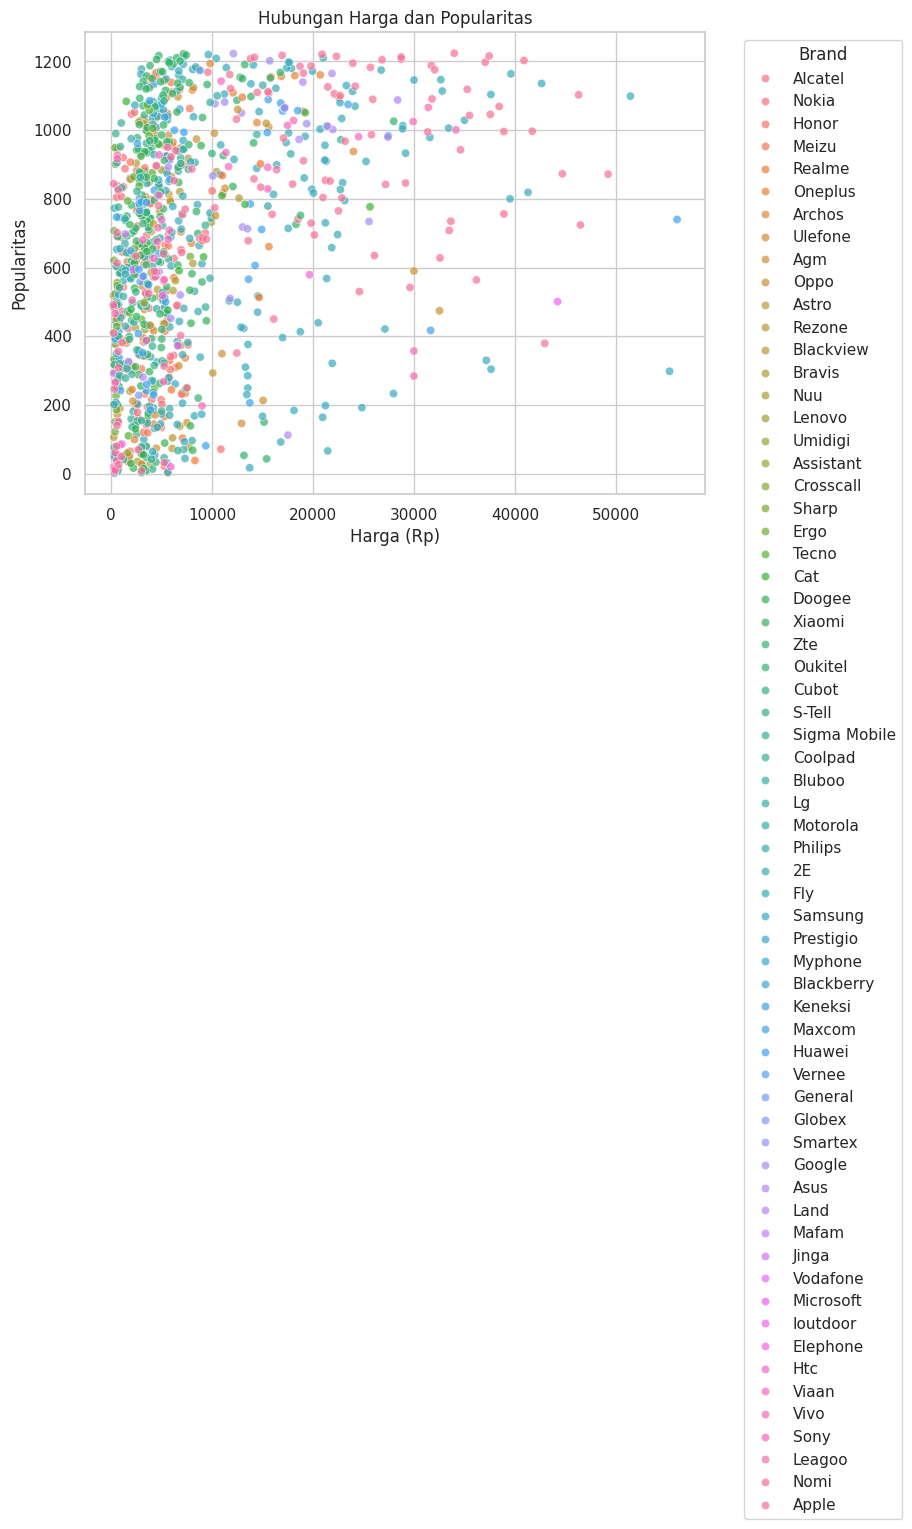

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='best_price', y='popularity', hue='brand_name', alpha=0.7)
plt.title('Hubungan Harga dan Popularitas')
plt.xlabel('Harga (Rp)')
plt.ylabel('Popularitas')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Gambar 4

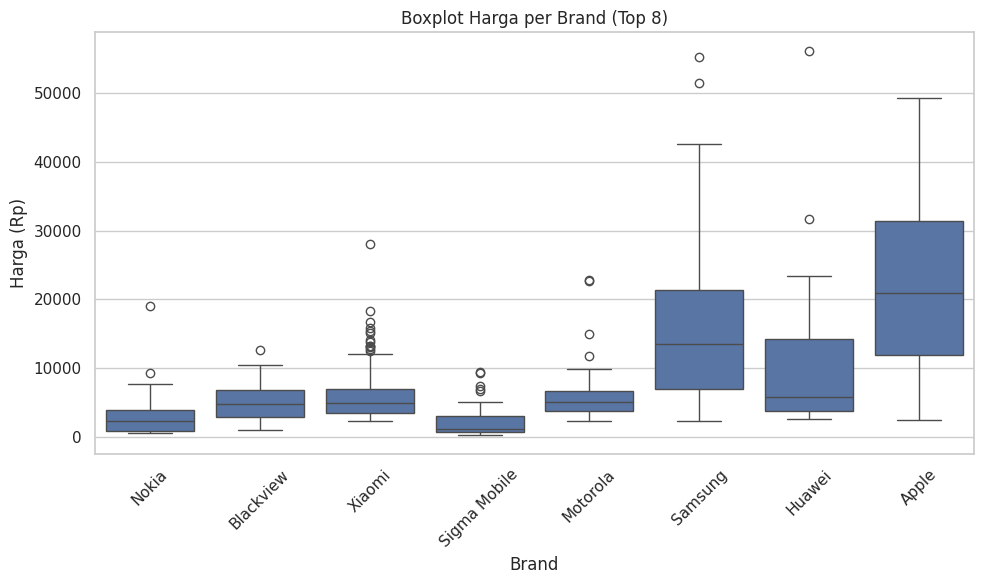

In [ ]:
# Boxplot Harga per Brand
top_brands = df['brand_name'].value_counts().index[:8]
plt.figure(figsize=(10,6))
sns.boxplot(data=df[df['brand_name'].isin(top_brands)], x='brand_name', y='best_price')
plt.title('Boxplot Harga per Brand (Top 8)')
plt.xlabel('Brand')
plt.ylabel('Harga (Rp)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Langkah 5

In [ ]:
# Ganti path sesuai lokasi data kamu
data_path = "MobilePhonesData_Cleaned.csv"

try:
    df = pd.read_csv(data_path)
except Exception:
    df = pd.read_csv(data_path, sep=';')

print("=== Info Dataset ===")
print("Shape:", df.shape)
display(df.head())

# Standardize column names
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

=== Info Dataset ===
Shape: (1068, 14)


,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date,age_years,release_year
0,Alcatel,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,2020-10-01,5,2020
1,Alcatel,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,2020-09-01,5,2020
2,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,4740.0,5499.0,10,5.71,16.0,3000.0,2020-04-01,5,2020
3,Honor,10 6/64GB Black,Android,71,10865.0,10631.0,11099.0,2,5.80,64.0,3400.0,2018-06-01,7,2018
4,Honor,10 Lite 3/32GB Blue,Android,424,3999.0,4740.0,5499.0,2,6.21,32.0,3400.0,2018-12-01,7,2018


# Langkah 6

In [ ]:
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

# Ubah kolom harga dan numerik ke tipe numerik
for col in ['price','release_year','sales','rating','ram','storage','battery']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Isi nilai kosong
if 'price' in df.columns:
    df['price'].fillna(df['price'].median(), inplace=True)
if 'brand' in df.columns:
    df['brand'].fillna('Unknown', inplace=True)

print("Jumlah missing value:")
print(df.isna().sum())


Jumlah missing value:
brand_name        0
model_name        0
os                0
popularity        0
best_price        0
lowest_price      0
highest_price     0
sellers_amount    0
screen_size       0
memory_size       0
battery_size      0
release_date      0
age_years         0
release_year      0
dtype: int64


# Langkah 7

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# Gambar 5

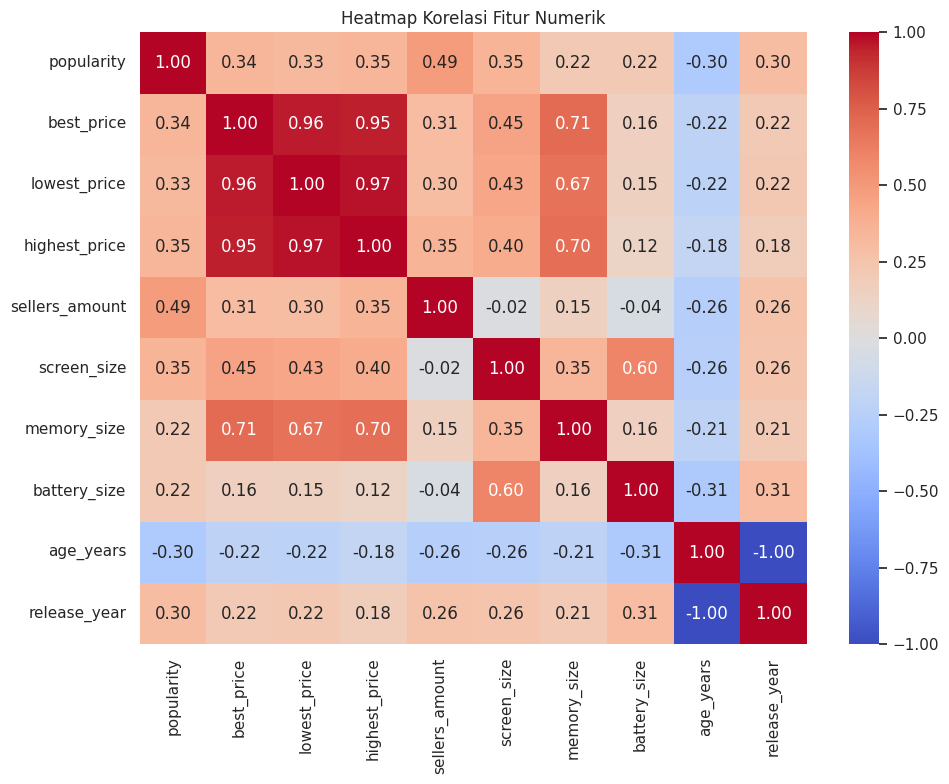

In [ ]:
# A. Hubungan Harga vs Rating
if 'price' in df.columns and 'rating' in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='price', y='rating', hue='brand', alpha=0.7)
    plt.title('Hubungan Harga dan Rating')
    plt.xlabel('Harga')
    plt.ylabel('Rating')
    plt.tight_layout()
    plt.savefig('figures/price_vs_rating.png')
    plt.show()

# B. Korelasi antar fitur numerik
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) >= 2:
    corr = df[num_cols].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Heatmap Korelasi Fitur Numerik')
    plt.tight_layout()
    plt.savefig('figures/correlation_heatmap.png')
    plt.show()
